In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing  import scale
import sklearn.metrics as sm
from matplotlib import pyplot as plt

#from google.colab import files
#uploaded = files.upload()

import pandas as pd
Hob_Person = pd.read_csv('dataForce.csv',index_col=0)

In [56]:
#Hob_Person.drop(Hob_Person_Norm.columns[0])
#Hob_Person_Norm = Hob_Person_Norm.loc[:, ~Hob_Person_Norm.columns.str.contains('^Unnamed')]
#Hob_Person_Norm.columns= ["Init","F0","F1","F2","F3","Fdist","Sx","Sy","erX","erY"]
Hob_Person.head()

,F0,F1,F2,F3,Fdist,Sx,Sy,erroX,erroY
0,-0.853840,-0.609361,0.463732,-0.565095,-0.935239,0.615354,-0.666164,-0.190210,3.207140
1,2.282001,-0.558448,1.103403,1.402729,1.020134,0.703283,-0.666794,-0.133579,0.283401
2,0.180799,-0.626006,-1.347892,-0.585134,-0.978774,0.749187,-0.651268,1.865529,0.425498
3,0.036213,1.221565,-0.345585,-0.557080,0.426020,-1.544215,1.481987,0.058178,-0.116549
4,-1.004060,1.955893,1.014689,-0.545056,1.432318,-2.074992,1.298036,-0.139824,0.469171


In [58]:
Hob_Person_Norm=(Hob_Person-Hob_Person.min())/(Hob_Person.max()-Hob_Person.min())

#Hob_Person_Norm.drop('Init')
Hob_Person_Norm.head()

,F0,F1,F2,F3,Fdist,Sx,Sy,erroX,erroY
0,0.161541,0.006980,0.430534,0.006437,0.153952,0.932428,0.039287,0.581425,0.648662
1,0.702169,0.019079,0.537066,0.437390,0.537215,0.960657,0.039092,0.584101,0.471628
2,0.339916,0.003025,0.128823,0.002048,0.145419,0.975394,0.043894,0.678539,0.480232
3,0.314989,0.442066,0.295749,0.008192,0.420766,0.239116,0.703606,0.593159,0.447411
4,0.135643,0.616566,0.522291,0.010825,0.618005,0.068715,0.646719,0.583806,0.482877


In [59]:
#using X as an array
#X = np.array(normalized_df)

from sklearn.cluster import KMeans

#find K value
valk=[]
for k in range(2,6):
    km=KMeans(n_clusters=k, max_iter=300)
    km.fit(Hob_Person_Norm)
    valk.append(km.inertia_)
#km.labels_.size


Text(0.5, 1.0, 'elbow method')

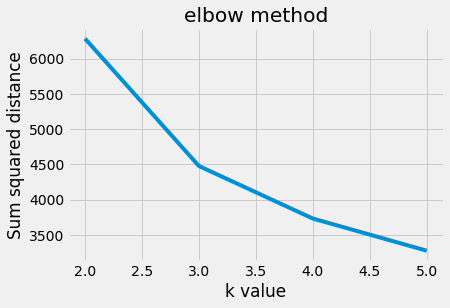

In [60]:
#plot elbow method graph to set best K value
from matplotlib import pyplot as plt
plt.plot(range(2,6),valk)
plt.xlabel('k value')
plt.ylabel('Sum squared distance')
plt.title('elbow method')

In [61]:
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Hob_Person_Norm)
    score = silhouette_score(Hob_Person_Norm, kmeans.labels_)
    silhouette_coefficients.append(score)

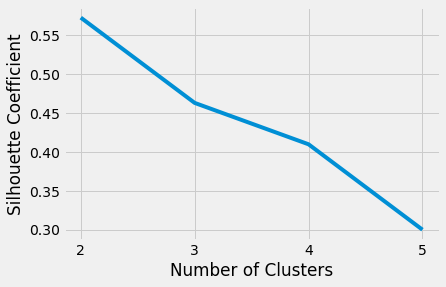

In [62]:
#plot the silhouette score
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

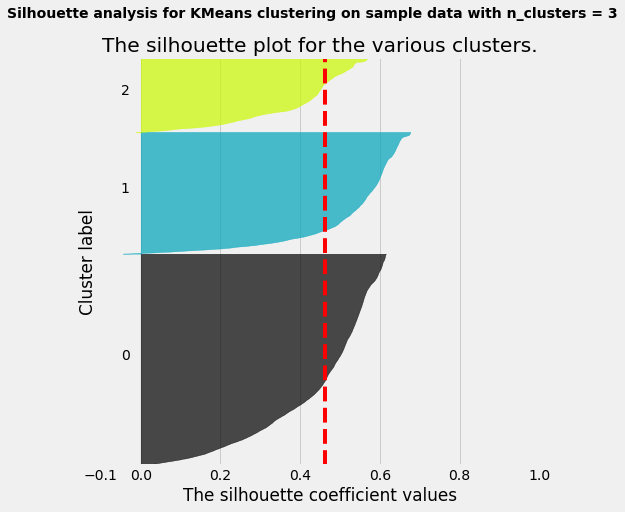

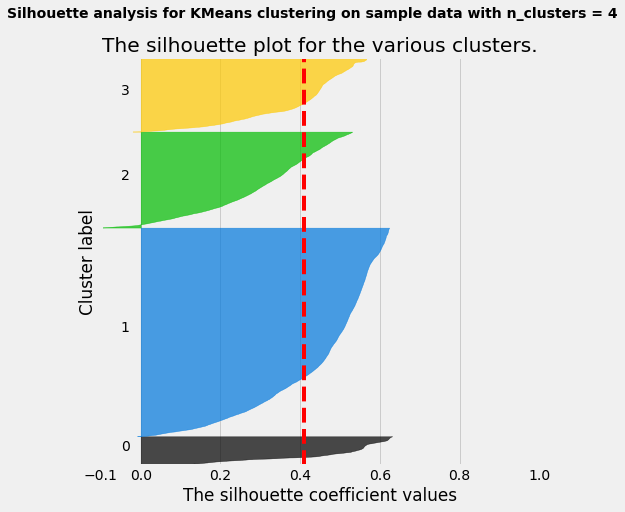

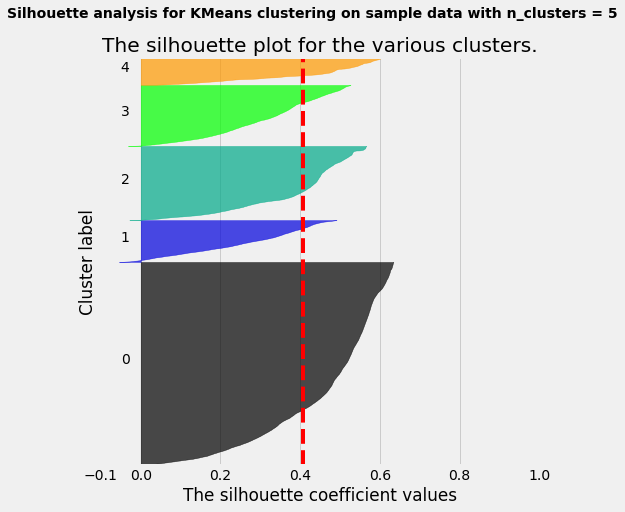

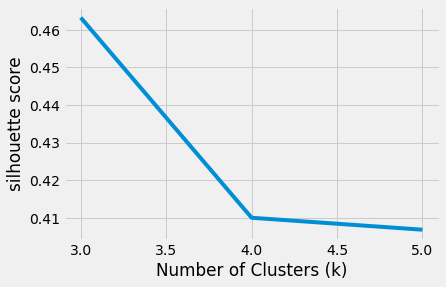

In [63]:
X = Hob_Person_Norm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [3, 4, 5]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, max_iter=300)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
   # print("For n_clusters =", n_clusters,
    #      "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [72]:
import seaborn as sb
import csv
#normalized_df
kmeans = KMeans(n_clusters = 3)
kmeans.fit(Hob_Person_Norm)
new_df = Hob_Person
new_df['K-classes'] = kmeans.labels_
#normalized_df.columns
#normalized_df.axes
#sb.pairplot(normalized_df,'K-classes')

#print(normalized_df)


import numpy as np
a = np.array(new_df)

with open('output.csv', 'a', newline='') as file:
        spamwriter = csv.writer(file, delimiter=' ',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        spamwriter.writerow(new_df.head())
        
        for linha in a:
            spamwriter.writerow(linha)

In [258]:
namesDataset=new_df.columns
namesDataset=namesDataset.drop('K-classes')
Academic_Hob=namesDataset.drop(['Reading','Art.exhibitions','Countryside..outdoors',
       'Dancing', 'Musical.instruments','Writing', 'Theatre','Fun.with.friends', 
       'Funniness','Criminal.damage', 'Self.criticism', 'Giving', 'God', 'Dreams', 'Number.of.friends', 'Socializing',
       'Getting.angry', 'Life.struggles', 'Happiness.in.life', 'Energy.levels',
       'Personality', 'Interests.or.hobbies','Foreign.languages'])
Artistic_Hob=namesDataset.drop(Academic_Hob)
Artistic_Hob=Artistic_Hob.drop(['Fun.with.friends', 'Funniness',
       'Criminal.damage', 'Self.criticism', 'Giving','God', 'Dreams', 'Number.of.friends', 'Socializing',
       'Getting.angry', 'Life.struggles', 'Happiness.in.life', 'Energy.levels',
       'Personality', 'Interests.or.hobbies'])
personal=namesDataset.drop(Academic_Hob)
personal=personal.drop(Artistic_Hob)

In [259]:
Academic_Hob

Index(['History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Economy.Management', 'Biology', 'Chemistry', 'Geography', 'Medicine',
       'Law', 'Science.and.technology'],
      dtype='object')

In [260]:
Artistic_Hob

Index(['Reading', 'Foreign.languages', 'Art.exhibitions',
       'Countryside..outdoors', 'Dancing', 'Musical.instruments', 'Writing',
       'Theatre'],
      dtype='object')

In [261]:
personal

Index(['Fun.with.friends', 'Funniness', 'Criminal.damage', 'Self.criticism',
       'Giving', 'God', 'Dreams', 'Number.of.friends', 'Socializing',
       'Getting.angry', 'Life.struggles', 'Happiness.in.life', 'Energy.levels',
       'Personality', 'Interests.or.hobbies'],
      dtype='object')

In [73]:
#namesDataset=namesDataset.drop('K-classes')
Kmeans_academic = new_df.pivot_table(values=new_df.columns,index=['K-classes'], aggfunc='mean')
Kmeans_academic

,F0,F1,F2,F3,Fdist,Sx,Sy,erroX,erroY
K-classes,,,,,,,,,
0,-0.196180,-0.589785,0.118632,-0.366903,-0.734940,0.598144,-0.606193,0.125533,-0.272337
1,0.358118,1.364018,-0.153249,-0.546075,0.877697,-1.459070,1.462142,-0.005816,-0.212437
2,-0.044441,-0.590562,-0.092749,1.937289,0.632330,0.733571,-0.710658,0.103672,-0.064848


In [275]:
Kmeans_academic.mean(axis = 1)

K-classes
0    2.992972
1    2.437066
2    3.318673
3    2.499123
4    2.144309
dtype: float64

In [273]:
Kmeans_artistic = new_df.pivot_table(values=Artistic_Hob,index=['K-classes'], aggfunc='mean')
Kmeans_artistic

,Art.exhibitions,Countryside..outdoors,Dancing,Foreign.languages,Musical.instruments,Reading,Theatre,Writing
K-classes,,,,,,,,
0,2.433735,3.789157,2.873494,3.716867,2.228916,3.500000,3.174699,1.686747
1,1.593750,3.223958,1.609375,3.182292,1.666667,1.666667,1.843750,1.187500
2,3.143519,3.990741,2.643519,4.189815,2.685185,3.500000,3.476852,2.083333
3,3.778947,4.173684,3.431579,4.315789,3.384211,4.110526,3.957895,3.000000
4,2.052846,3.345528,1.934959,3.512195,1.764228,3.056911,2.727642,1.573171


In [274]:
Kmeans_artistic.mean(axis = 1)

K-classes
0    2.925452
1    1.996745
2    3.214120
3    3.769079
4    2.495935
dtype: float64

In [266]:
Kmeans_personal = new_df.pivot_table(values=personal,index=['K-classes'], aggfunc='mean')
Kmeans_personal

,Criminal.damage,Dreams,Energy.levels,Fun.with.friends,Funniness,Getting.angry,Giving,God,Happiness.in.life,Interests.or.hobbies,Life.struggles,Number.of.friends,Personality,Self.criticism,Socializing
K-classes,,,,,,,,,,,,,,,
0,2.469880,3.234940,3.759036,4.548193,3.150602,3.150602,2.951807,3.451807,3.662651,3.415663,3.439759,3.228916,3.234940,3.710843,3.186747
1,3.151042,3.359375,3.802083,4.578125,3.567708,2.770833,2.734375,2.807292,3.848958,3.822917,1.807292,3.552083,3.411458,3.130208,3.223958
2,2.370370,3.379630,3.856481,4.606481,3.532407,2.740741,3.064815,3.231481,3.944444,3.916667,2.648148,3.472222,3.421296,3.773148,3.324074
3,2.347368,3.263158,3.715789,4.773684,3.294737,3.142105,3.331579,3.873684,3.700000,3.963158,3.836842,3.605263,3.215789,3.773684,3.410526
4,2.654472,3.243902,3.166667,4.345528,2.959350,3.256098,2.829268,3.207317,3.422764,2.796748,3.426829,2.943089,3.178862,3.528455,2.743902


In [267]:
Kmeans_personal.mean(axis = 1)

K-classes
0    3.373092
1    3.304514
2    3.418827
3    3.549825
4    3.180217
dtype: float64

In [268]:
Demogra=pd.read_csv('dados/SocioDemographic_Vars.txt', delimiter = "\t")
Demogra['K-classes'] = kmeans.labels_
Demogra.head()

,Age,Gender,Only.child,Education,K-classes
1,20,female,no,college/bachelor degree,1
2,19,female,no,college/bachelor degree,1
3,20,female,no,secondary school,3
4,22,female,yes,college/bachelor degree,4
5,20,female,no,secondary school,4


In [269]:
onlyChild=Demogra.pivot_table(index=['K-classes','Gender'], aggfunc='size')
print (onlyChild)

K-classes  Gender
0          female    125
           male       41
1          female     23
           male      169
2          female    101
           male      114
3          female    168
           male       21
4          female    176
           male       66
dtype: int64


In [270]:
onlyChild=Demogra.pivot_table(index=['K-classes','Education'], aggfunc='size')
print (onlyChild)

K-classes  Education                       
0          college/bachelor degree              27
           currently a primary school pupil      2
           masters degree                       12
           primary school                        9
           secondary school                    116
1          college/bachelor degree              40
           currently a primary school pupil      2
           doctorate degree                      1
           masters degree                       12
           primary school                       14
           secondary school                    123
2          college/bachelor degree              62
           currently a primary school pupil      1
           doctorate degree                      3
           masters degree                       23
           primary school                        9
           secondary school                    117
3          college/bachelor degree              39
           currently a primary school 